In [373]:
import pandas_profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as shc

In [374]:
# Read Dataset
dataSet=pd.read_csv('Happiness-Data.csv')

In [375]:
dataSet

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [376]:
df2 = dataSet.copy()

# Show Dataset Headings
df2.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [377]:
df2.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [378]:
# Drop Unwanted Columns
drp = df2.drop(labels=['Country name', 'Regional indicator','Standard error of ladder score','upperwhisker','lowerwhisker'], axis=1)
drp = drp.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
drp.tail()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
144,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,3.415,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [379]:
df1 = drp.iloc[:,[1,2,3,4,5,6]]
df1

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,10.775,0.954,72.000,0.949,-0.098,0.186
1,10.933,0.954,72.700,0.946,0.030,0.179
2,11.117,0.942,74.400,0.919,0.025,0.292
3,10.878,0.983,73.000,0.955,0.160,0.673
4,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...
144,7.926,0.787,48.700,0.715,-0.131,0.915
145,9.782,0.784,59.269,0.824,-0.246,0.801
146,7.676,0.552,61.400,0.897,0.061,0.167
147,7.943,0.750,56.201,0.677,-0.047,0.821


In [380]:
df1.shape

(149, 6)

In [381]:
drp.shape

(149, 15)

<Figure size 3600x1440 with 0 Axes>

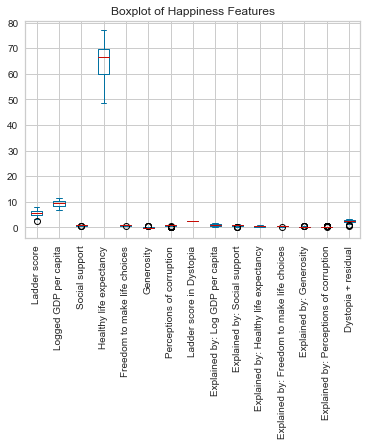

In [382]:
fig = plt.figure(figsize =(50, 20))
drp.plot.box(title='Boxplot of Happiness Features',rot=90)
plt.show()

/Users/thilangaattanayake/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support'>

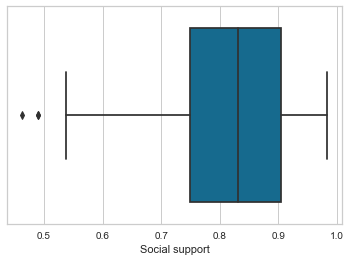

In [383]:
sns.boxplot(drp['Social support'])

/Users/thilangaattanayake/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices'>

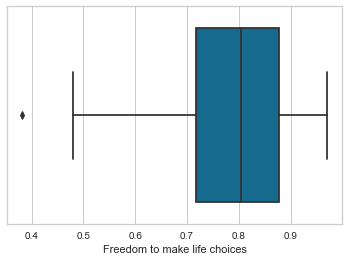

In [384]:
sns.boxplot(drp['Freedom to make life choices'])

/Users/thilangaattanayake/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Generosity'>

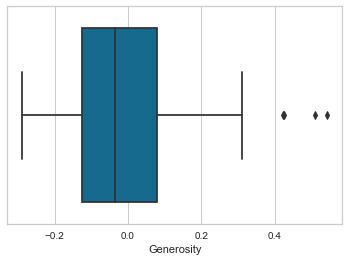

In [385]:
sns.boxplot(drp['Generosity'])

/Users/thilangaattanayake/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Perceptions of corruption'>

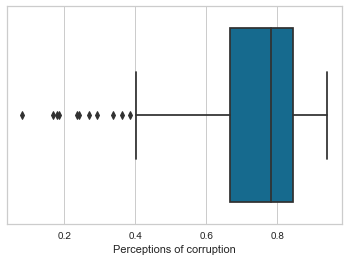

In [386]:
sns.boxplot(drp['Perceptions of corruption'])

In [387]:
# Social Support
social_support_arr = np.array(np.where(drp['Social support']<0.52))
print('Social Support Array',social_support_arr[0])

# Freedom of Choices
freedom_of_choices_arr = np.array(np.where(drp['Freedom to make life choices']<0.4))
print('Freedom to Make Life Choices Array',freedom_of_choices_arr[0])

# Generosity
generosity_arr = np.array(np.where(drp['Generosity']>0.4))
print('Generosity' ,generosity_arr[0])

# From Perception of Curruption
perception_of_curruption_arr = np.array(np.where(drp['Perceptions of corruption']<=0.57))
print('Perceptions of Corruption' ,perception_of_curruption_arr[0])


Social Support Array [ 98 139 148]
Freedom to Make Life Choices Array [148]
Generosity [ 81  97 125 142]
Perceptions of Corruption [  0   1   2   4   5   6   7   8   9  10  12  13  14  16  31  39  41  76
  77  89 146]


In [388]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scale = scaler.fit_transform(df1)

df_norm = scale

c = pd.DataFrame(df_norm)
c.describe()

,0,1,2,3,4,5
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.558102,0.676433,0.579975,0.696594,0.328754,0.753150
std,0.231165,0.220940,0.237473,0.192741,0.181514,0.209132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380287,0.551923,0.397682,0.571429,0.195181,0.682614
50%,0.585395,0.709615,0.636523,0.717687,0.303614,0.815636
75%,0.755387,0.850000,0.741773,0.841837,0.442169,0.890315
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [389]:
len(c.head())

5

In [390]:
pca = PCA(n_components = len(c.head()))
p_Components = pca.fit_transform(df_norm)

([<matplotlib.axis.XTick at 0x7f89608b0df0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

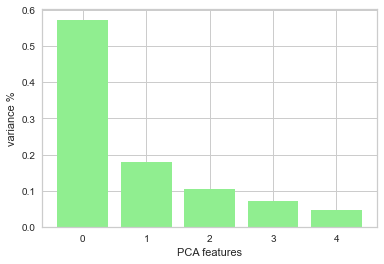

In [391]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='lightgreen')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [392]:
PCA_components = pd.DataFrame(p_Components)
PCA_components

,0,1,2,3,4
0,-0.658129,0.333030,-0.315011,-0.120336,-0.163020
1,-0.680369,0.419308,-0.241534,-0.014905,-0.137139
2,-0.675921,0.302958,-0.191194,0.032864,-0.056363
3,-0.557965,0.134361,0.246640,0.047264,0.010051
4,-0.589364,0.385664,-0.051615,0.119518,-0.071155
...,...,...,...,...,...
144,0.594383,-0.147735,0.071113,-0.183074,-0.292367
145,0.090612,-0.177715,-0.084418,-0.235555,-0.058590
146,0.293433,0.714492,-0.459337,-0.178323,0.128893
147,0.478404,-0.059973,-0.017723,-0.014960,-0.123528


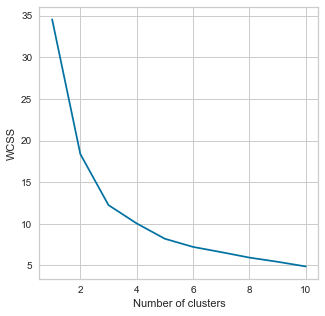

In [393]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(PCA_components.iloc[:,:3])
   wcss.append(model.inertia_)
plt.figure(figsize=(5,5))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

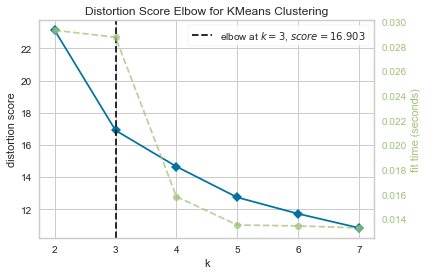

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [394]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(2,8))
visualizer.fit(PCA_components)
visualizer.show()

In [395]:
model = KMeans(n_clusters =3 ,init = "k-means++")
label = model.fit_predict(PCA_components.iloc[:,:3])
centers = np.array(model.cluster_centers_)
uniq = np.unique(label)

In [396]:
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [397]:
frame =PCA_components
frame['cluster'] = label
frame['cluster'].value_counts()

2    82
0    45
1    22
Name: cluster, dtype: int64

In [398]:
centers

array([[ 0.48360533,  0.11224312, -0.01284982],
       [-0.5576171 ,  0.2673997 , -0.08814122],
       [-0.11578858, -0.13333822,  0.03069937]])

In [399]:
uniq

array([0, 1, 2], dtype=int32)

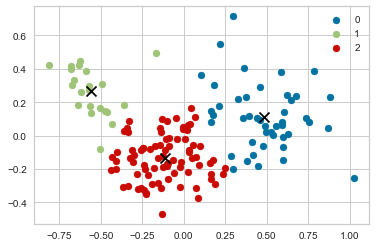

In [400]:
T=PCA_components.iloc[:,:3].values  
for i in uniq:
        
    plt.scatter(T[label == i, 0] ,T[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='black',s=100)
# This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [401]:
frame.head(20)

,0,1,2,3,4,cluster
0,-0.658129,0.333030,-0.315011,-0.120336,-0.163020,1
1,-0.680369,0.419308,-0.241534,-0.014905,-0.137139,1
2,-0.675921,0.302958,-0.191194,0.032864,-0.056363,1
3,-0.557965,0.134361,0.246640,0.047264,0.010051,1
4,-0.589364,0.385664,-0.051615,0.119518,-0.071155,1
5,-0.681232,0.397922,-0.125192,0.017542,-0.081335,1
6,-0.633071,0.423743,-0.173685,0.019420,-0.085546,1
7,-0.637493,0.181897,-0.190282,0.011300,-0.019725,1
8,-0.622214,0.443856,-0.137639,0.069475,-0.092357,1
9,-0.561802,0.179060,-0.041840,0.033795,-0.009637,1


In [406]:
xvector =  pca.components_[0] * max(T[0])
yvector =  pca.components_[1] * max(T[1])
col = df1.columns

In [407]:
col

Index(['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

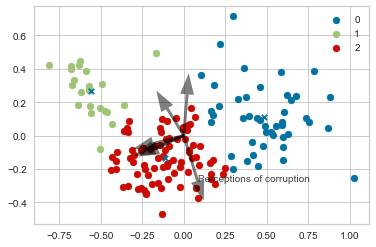

In [408]:
#  plot the 'name of individual features' along with vector length
for i in range(len(col)):
    # plot arrows
   
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='black', width=0.015,
                head_width=0.08, alpha=0.5
            )
    
    # plot name of features
plt.text(xvector[i], yvector[i], list(col)[i], color='black', alpha=0.75)

#T=PCA_components.iloc[:,:3].values
for i in uniq:
        
    plt.scatter(T[label == i, 0] ,T[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='b',s=30)
#This is done to find the centroid for each clusters.

plt.legend()
plt.show()

In [409]:
df1.shape

(149, 6)

In [410]:
d = df1.copy()

In [411]:
d

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,10.775,0.954,72.000,0.949,-0.098,0.186
1,10.933,0.954,72.700,0.946,0.030,0.179
2,11.117,0.942,74.400,0.919,0.025,0.292
3,10.878,0.983,73.000,0.955,0.160,0.673
4,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...
144,7.926,0.787,48.700,0.715,-0.131,0.915
145,9.782,0.784,59.269,0.824,-0.246,0.801
146,7.676,0.552,61.400,0.897,0.061,0.167
147,7.943,0.750,56.201,0.677,-0.047,0.821


In [412]:
PCA_components = pd.DataFrame(p_Components)
PCA_components
k=(PCA_components.iloc[:,:3])

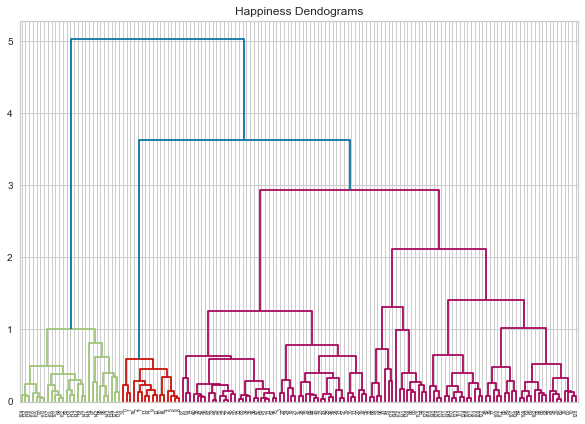

In [413]:
plt.figure(figsize=(10, 7))
plt.title("Happiness Dendograms")
dend = shc.dendrogram(shc.linkage(k, method='ward'))